In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os,glob,random
import matplotlib.pyplot as plt

In [93]:
def walk_through_directory(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'")

In [94]:
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Training")
print("-----------------------------------------------------------")
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Testing")
print("-----------------------------------------------------------")
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Validation")


There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Training'
There are 0 directories and 3880 images in'Bleached Corals and Healthy Corals Classification/Training\bleached_corals'
There are 0 directories and 3504 images in'Bleached Corals and Healthy Corals Classification/Training\healthy_corals'
-----------------------------------------------------------
There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Testing'
There are 0 directories and 485 images in'Bleached Corals and Healthy Corals Classification/Testing\bleached_corals'
There are 0 directories and 438 images in'Bleached Corals and Healthy Corals Classification/Testing\healthy_corals'
-----------------------------------------------------------
There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Validation'
There are 0 directories and 485 images in'Bleached Corals and Healthy Corals Classification/Validation\bleach

In [95]:
c=train_generator.class_indices
classes=list(c.keys())
classes

['bleached_corals', 'healthy_corals']

# Augmenting the dataset temporarily

In [146]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Training",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")
test_generator=test_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Testing",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")
valid_generator=valid_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Validation",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")


Found 7384 images belonging to 2 classes.
Found 923 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


In [139]:
print(len(train_generator))
print(len(test_generator))
print(len(valid_generator))

116
15
16


In [131]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [132]:
type(mobile)

keras.engine.functional.Functional

In [133]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Removing the last 5 layers of the original model

In [171]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Flatten,Dense
x=mobile.layers[-5].output
x=GlobalAveragePooling2D()(x)
output=Dense(1,activation="sigmoid")(x)

# Freezing all the layers except the last 25 layers

In [172]:
from tensorflow.keras.models import Model
model=Model(inputs=mobile.input,outputs=output)

for layer in model.layers[:-25]:
    layer.trainable=False

In [173]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [174]:
# Print shapes of the first batch from the generators
train_data, train_labels = next(iter(train_generator))
valid_data, valid_labels = next(iter(valid_generator))
print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Validation data shape:', valid_data.shape)
print('Validation labels shape:', valid_labels.shape)


Train data shape: (64, 224, 224, 3)
Train labels shape: (64,)
Validation data shape: (64, 224, 224, 3)
Validation labels shape: (64,)


In [175]:
from tensorflow.keras.optimizers.legacy import Adam
model.build((64,224,224,3))
model.compile(optimizer="Adam",
             metrics=['accuracy'],
             loss='binary_crossentropy')


# Training the model

In [176]:
from tensorflow.keras.callbacks import EarlyStopping
early_callback=EarlyStopping(monitor='val_loss',
                            verbose=1,
                            mode="auto",
                            min_delta=0.001,
                            patience=5)
history=model.fit(train_generator,
                 steps_per_epoch=len(train_generator),
                 validation_data=valid_generator,
                  epochs=40,
                  validation_steps=len(valid_generator),
                 callbacks=[early_callback])

Epoch 1/40
116/116 [==============================] - 153s 1s/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.6728 - val_accuracy: 0.8193
Epoch 2/40
116/116 [==============================] - 169s 1s/step - loss: 0.0165 - accuracy: 0.9940 - val_loss: 2.5637 - val_accuracy: 0.6741
Epoch 3/40
116/116 [==============================] - 175s 2s/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.2202 - val_accuracy: 0.9239
Epoch 4/40
116/116 [==============================] - 180s 2s/step - loss: 0.0190 - accuracy: 0.9927 - val_loss: 1.0914 - val_accuracy: 0.8162
Epoch 5/40
116/116 [==============================] - 185s 2s/step - loss: 0.0206 - accuracy: 0.9920 - val_loss: 12.1695 - val_accuracy: 0.4954
Epoch 6/40
116/116 [==============================] - 193s 2s/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 1.7559 - val_accuracy: 0.6609
Epoch 7/40
116/116 [==============================] - 202s 2s/step - loss: 0.0100 - accuracy: 0.9961 - val_loss: 4.4611 - val_accuracy: 0.591

In [177]:
loss,accuracy=model.evaluate(test_generator)
print("Test loss: ",loss)
print("Test accuracy: ",accuracy)

15/15 [==============================] - 12s 766ms/step - loss: 1.1785 - accuracy: 0.8353
Test loss:  1.1784664392471313
Test accuracy:  0.8353196382522583


In [178]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


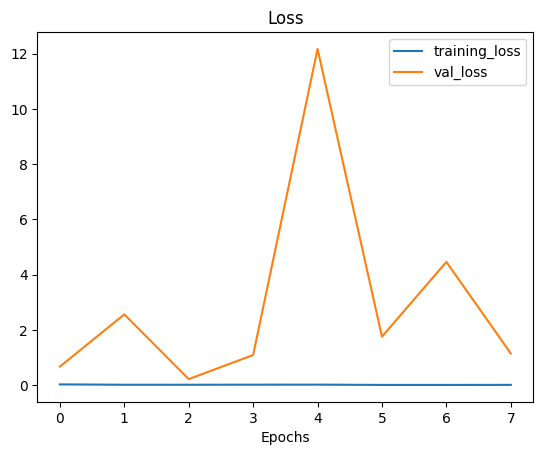

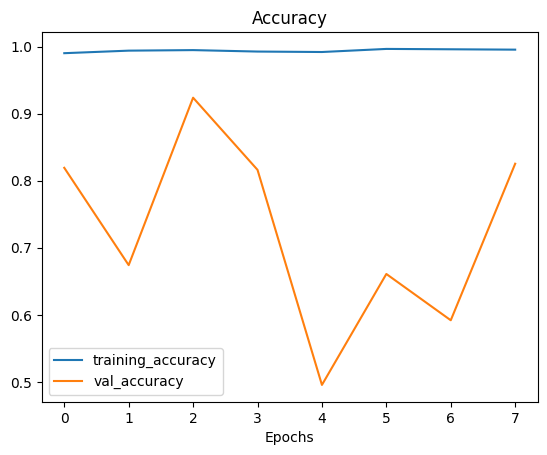

In [179]:
plot_loss_curves(history)

In [180]:
model.save("Mobilenet-Corals Classification.h5")

In [182]:
def load_and_prep_image(filename,img_shape=224,scale=True):
    img=tf.io.read_file(filename)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[img_shape,img_shape])
    if scale:
        return img/255.0
    else:
        return img

In [185]:
def pred_and_plot(model,filename,class_names):
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred.argmax()]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 120ms/step


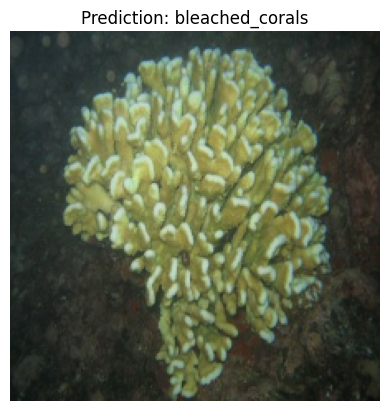

In [190]:
pred_and_plot(model,"Pred_samples/bleached_internet.jpg",classes)

In [191]:
import tensorflow as tf
model=tf.keras.models.load_model("Mobilenet-Corals Classification.h5")
tflite_converter=tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model=tflite_converter.convert()
open("Mobilenet_model-1-CoralsClassification_tflite.tflite","wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Aneesh\AppData\Local\Temp\tmpxejb5yso\assets


INFO:tensorflow:Assets written to: C:\Users\Aneesh\AppData\Local\Temp\tmpxejb5yso\assets


12804604